In [12]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, fftfreq
import numpy as np
rate, data = wav.read('audio/a-440-sine.wav')

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.99995465e+00
 2.99997732e+00 3.00000000e+00]
44100


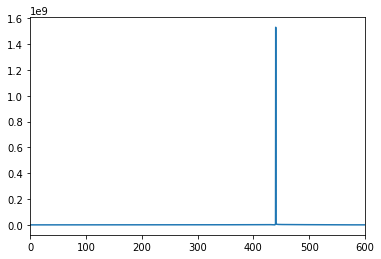

In [48]:
print(time)
print(rate)

In [13]:
def fft4Dummies(data, rate):
    
    fft_out = fft(data)
    freq_vector = fftfreq(len(fft_out), 1.0/rate)
    fft_trim = fft_out[range(len(fft_out)//2)]
    freq_vector_trim = freq_vector[range(len(fft_out)//2)]
    
    return freq_vector_trim, fft_trim

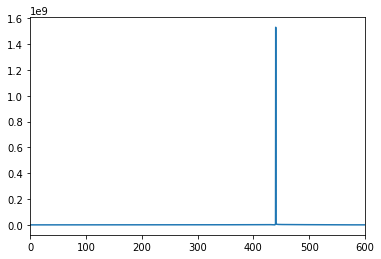

In [14]:
freq_vector_trim, fft_trim = fft4Dummies(data, rate)
plt.plot(freq_vector_trim,np.abs(fft_trim))
# plt.ylim(0, 2000) 
plt.xlim(0,600)
plt.show()